In [ ]:
!pip install feedparser # RSS에서 XML 태그별 정보 추출 (title, link...)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=d6e3785d8fa186f58b2560ac2153bf2f4a5eefe9f1a0075f79fd333386488114
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [ ]:
!pip install newspaper3k # 인터넷 신문기사 분석 (Article()) (3k: 파이썬 3.x 버전)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 63.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=de46a85a2d164b26e8f29e4f5faf15e33579ed5a8f849784aba3f91ad5399917
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=5da7e6b9c260640c8a23836dea582459cb270a10ec90f32e99ebe4021004a0fd
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc933e41c4ccd6a8f8edb
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398382 sha256=f94c9bd423

In [ ]:
!pip install konlpy # korea nlp python 한국어 NLP 분석기 (여기서는 주어진 문장에서 명사만 추출하는 용도로 사용)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 2.8 MB/s eta 0:00:00


In [ ]:
import feedparser # RSS를 입력받았을 때 이를 쪼개서 <item>...</item> 불러올 수 있게끔 함
from newspaper import Article # 각 tag에 대해 쪼개서 처리 가능
from bs4 import BeautifulSoup # 인터넷에서 기사 긁어올 수 있게끔 함 (+ 전처리 - html 태그 제거)

In [ ]:
# 1. 모든 RSS 파일 돌아다니며 기사의 title, link 추출
urls = ['http://rss.etnews.com/Section901.xml',
        'http://rss.etnews.com/Section902.xml',
        'http://rss.etnews.com/Section903.xml',
        'http://rss.etnews.com/Section904.xml']

# RSS 목록의 리스트 안에 존재하는 모든 기사의 title와 link를 리스트로 반환
def crawl_rss(urls):
    array_rss = []
    set_titles = set() # 중복 기사 제거 (기사 제목들의 집합 구성)
    for url in urls:
        print('[Crawl URL]', url)
        parse_rss = feedparser.parse(url) # 현재 url을 파싱한 뒤 결과를 parse_rss에 저장
        for p in parse_rss.entries: # parse_rss에 있는 모든 entreis(기사) 검색
            if p.title not in set_titles: # 중복 기사 제거
                array_rss.append({'title': p.title, 'link': p.link}) # title, link 추출해 리스트에 추가
                set_titles.add(p.title)
            else:
                print('Duplicated Article:', p.title)
    return array_rss

In [ ]:
list_articles = crawl_rss(urls)

[Crawl URL] http://rss.etnews.com/Section901.xml
[Crawl URL] http://rss.etnews.com/Section902.xml
Duplicated Article: LS에코에너지,덴마크에 3000만달러 규모 초고압 케이블 공급
Duplicated Article: LG전자, 월드IT쇼 2024에서 AI 혁신 제품 선봬
[Crawl URL] http://rss.etnews.com/Section903.xml
Duplicated Article: 中, 5G-A 세계 1위…韓, 통신선도국 위태
[Crawl URL] http://rss.etnews.com/Section904.xml
Duplicated Article: LS에코에너지,덴마크에 3000만달러 규모 초고압 케이블 공급
Duplicated Article: LG전자, 월드IT쇼 2024에서 AI 혁신 제품 선봬
Duplicated Article: 미 펜타곤 근처 '피자가게' 주문량 보면 알 수 있는 것?
Duplicated Article: 삼성·마이크론 겨냥, 日 레조낙 NCF 생산량 늘린다
Duplicated Article: 세월호 10주기…與 “재발 방지 노력” 野 “정치 책무 다할 것”
Duplicated Article: “中 1분기 반도체(IC) 생산량, 전년보다 40% 증가”
Duplicated Article: 닻 올리는 'AI 교수학습 플랫폼' 사업, 네이버·카카오 등 클라우드 기업 도전장
Duplicated Article: 탕후루 대신 새로 유행하는 디저트의 정체는...? [숏폼]
Duplicated Article: 다리 길이만 134cm, 세계 1위 롱다리 여성의 고민은 '이것'
Duplicated Article: 법에 가로막힌 까치와 강아지의 남다른 우정
Duplicated Article: “반려견과 나란히 비행기를 탄다?”… 러 항공사 요금은?
Duplicated Article: 美 가정집에 떨어진 '운석?'…NASA “우주정거장 쓰레기 맞아”
Dupl

In [ ]:
list_articles[:5]

[{'title': 'LS에코에너지,덴마크에 3000만달러 규모 초고압 케이블 공급',
  'link': 'https://www.etnews.com/20240417000096'},
 {'title': 'LG전자, 월드IT쇼 2024에서 AI 혁신 제품 선봬',
  'link': 'https://www.etnews.com/20240417000087'},
 {'title': "미 펜타곤 근처 '피자가게' 주문량 보면 알 수 있는 것?",
  'link': 'https://www.etnews.com/20240417000047'},
 {'title': '삼성·마이크론 겨냥, 日 레조낙 NCF 생산량 늘린다',
  'link': 'https://www.etnews.com/20240417000037'},
 {'title': '세월호 10주기…與 “재발 방지 노력” 野 “정치 책무 다할 것”',
  'link': 'https://www.etnews.com/20240417000012'}]

In [ ]:
len(list_articles)

77

In [ ]:
# 불용어(不用語: stop words) 제거
def preprocessing(text):
    text_article = BeautifulSoup(text, 'html5lib').get_text() # html 태그 제거
    return text_article

In [ ]:
# 2. 리스트의 모든 link 돌아다니면서 본문 text 긁어오기
# 언어는 한글로 기본 지정

def crawl_article(url, language='ko'):
    print('[Crawl Article]', url) # title과 text를 추출할 현재 url 출력
    a = Article(url, language = language)
    a.download()
    a.parse()
    return a.title, preprocessing(a.text) # 기사의 title과 text 출력

In [ ]:
for article in list_articles:
    _, text = crawl_article(article['link'])
    article['text'] = text

[Crawl Article] https://www.etnews.com/20240417000096
[Crawl Article] https://www.etnews.com/20240417000087
[Crawl Article] https://www.etnews.com/20240417000047
[Crawl Article] https://www.etnews.com/20240417000037
[Crawl Article] https://www.etnews.com/20240417000012
[Crawl Article] https://www.etnews.com/20240417000001
[Crawl Article] https://www.etnews.com/20240416000205
[Crawl Article] https://www.etnews.com/20240416000404
[Crawl Article] https://www.etnews.com/20240416000396
[Crawl Article] https://www.etnews.com/20240416000390
[Crawl Article] https://www.etnews.com/20240416000373
[Crawl Article] https://www.etnews.com/20240416000344
[Crawl Article] https://www.etnews.com/20240416000399
[Crawl Article] https://www.etnews.com/20240416000375
[Crawl Article] https://www.etnews.com/20240416000174
[Crawl Article] https://www.etnews.com/20240416000164
[Crawl Article] https://www.etnews.com/20240416000153
[Crawl Article] https://www.etnews.com/20240416000354
[Crawl Article] https://www.

In [ ]:
print(list_articles[0])

{'title': 'LS에코에너지,덴마크에 3000만달러 규모 초고압 케이블 공급', 'link': 'https://www.etnews.com/20240417000096', 'text': 'LS에코에너지는 덴마크 에너지 공기업 에네르기넷에 3년간 약 3051만달러(약 426억원) 규모 초고압 케이블을 공급한다고 17일 밝혔다. 회사는 이달 초에도 덴마크에 약 1300만달러 규모 초고압 케이블을 공급한 바 있다.\n\n\n\n덴마크는 해상풍력단지 건설과 가공 송전선 지중화로 초고압 케이블 수요가 많은 지역이다. LS에코에너지는 그동안 덴마크에 1000㎞가 넘는 케이블을 공급했다.\n\n\n\n모회사인 LS전선과의 교차판매 전략도 성과를 내고 있다고 회사는 설명했다. LS에코에너지는 LS전선과 함께 지난 8년간 에네르기넷과 장기공급계약을 통해 덴마크 170kV 이하와 220kV 이상 케이블 부분에서 각각 1위 공급자로 자리잡았다.\n\n\n\n이상호 LS에코에너지 대표는 “유럽의 에너지 안보 정책에 따른 해상풍력단지 건설, 기존 가공선의 지중화 등으로 케이블 수요가 급증하고 있다”며 “LS전선과 협력해 고부가 초고압 케이블 시장을 적극 확대하겠다”고 말했다.\n\n\n\n정현정 기자 iam@etnews.com'}


In [ ]:
print(list_articles[0]['text'])

LS에코에너지는 덴마크 에너지 공기업 에네르기넷에 3년간 약 3051만달러(약 426억원) 규모 초고압 케이블을 공급한다고 17일 밝혔다. 회사는 이달 초에도 덴마크에 약 1300만달러 규모 초고압 케이블을 공급한 바 있다.



덴마크는 해상풍력단지 건설과 가공 송전선 지중화로 초고압 케이블 수요가 많은 지역이다. LS에코에너지는 그동안 덴마크에 1000㎞가 넘는 케이블을 공급했다.



모회사인 LS전선과의 교차판매 전략도 성과를 내고 있다고 회사는 설명했다. LS에코에너지는 LS전선과 함께 지난 8년간 에네르기넷과 장기공급계약을 통해 덴마크 170kV 이하와 220kV 이상 케이블 부분에서 각각 1위 공급자로 자리잡았다.



이상호 LS에코에너지 대표는 “유럽의 에너지 안보 정책에 따른 해상풍력단지 건설, 기존 가공선의 지중화 등으로 케이블 수요가 급증하고 있다”며 “LS전선과 협력해 고부가 초고압 케이블 시장을 적극 확대하겠다”고 말했다.



정현정 기자 iam@etnews.com


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # 텍스트에서 단어(핵심어) 뽑아내 벡터 만들기 위함
from sklearn.metrics.pairwise import cosine_similarity # 코사인 함수 이용해 코사인 유사도 판단하기 위함

In [ ]:
# 3. 본문 text를 코사인 유사도를 확인하여 판단 (ex: 첫번째 기사와 두번째 기사의 유사도 판단)

# text_articles = []
# for article in list_articles:
#     text_articles.append(article['text'])

text_articles = [article['text'] for article in list_articles] # 위 3줄과 같은 의미

vector = TfidfVectorizer(max_features=5000) # 문장을 크기 5000의 벡터로 바꾸는 객체 생성
tfidf_vectors = vector.fit_transform(text_articles) # 벡터 생성

print(tfidf_vectors.shape) # ((77, 5000): 77개 기사에 대해 크기가 5000인 벡터 생성됨)
print(cosine_similarity(tfidf_vectors[0], tfidf_vectors[1])) # 첫번째 기사와 두번째 기사 비교

(77, 5000)
[[0.00698024]]


적절한 벡터의 크기는 뭘까? → 분포 보고 적절히 결정할 것

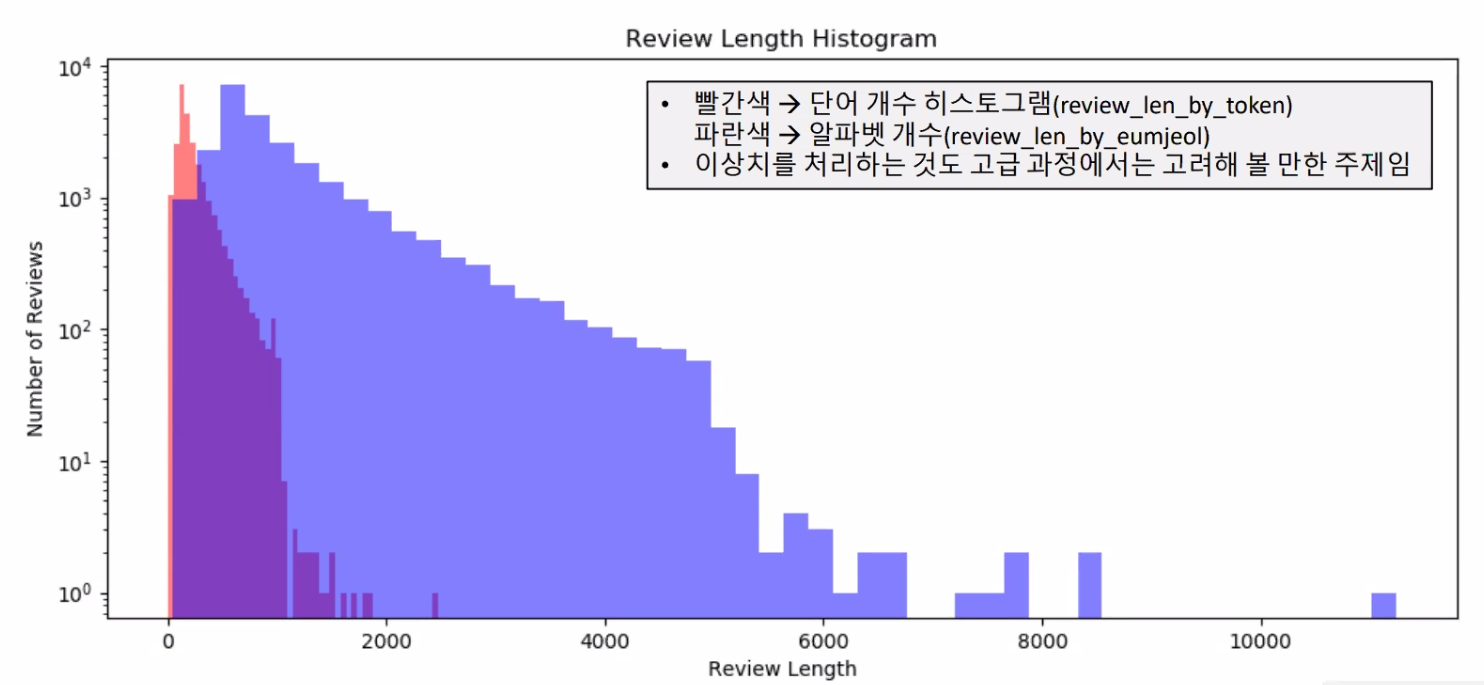

벡터 크기 너무 작아서 없어지는 부분과, 벡터 크기 너무 커서 남아서 0으로 채워지는 부분에 대해 조절을 잘 해줘야 함

(예를 들어, 영화리뷰는 뒷부분 볼 필요 없이 앞부분만 봐도 ㄱㅊ(긍/부 리뷰))

In [ ]:
# 4. 글(단어/문장)을 입력 받아서 그 검색어와 가장 유사한 기사를 출력

query = [input('질의어 입력: ')]
target = vector.transform(query)
similarities = [(i, cosine_similarity(target, tfidf_vector)) for i, tfidf_vector in enumerate(tfidf_vectors)]

index, max_silimarity = max(similarities, key = lambda x:x[1])
# 유사도인 cosine_similarity(target, tfidf_vector)를 key로 key가 가장 큰 값에 대해 i와 유사도를 각각 index와 max_similarity에 넣어줌

print('유사도가 가장 높은 기사의 인덱스: ', index)
print('유사도: %5.2f%%' %(100*max_silimarity.item())) # ndarray에 들어있는 값 빼오기 위해 .item(), 소수점 아래 둘째자리까지 표현
print('유사도가 가장 높은 기사의 제목: ', list_articles[index]['title'])
print('유사도가 가장 높은 기사의 URL: ', list_articles[index]['link'])

질의어 입력: AI
유사도가 가장 높은 기사의 인덱스:  36
유사도: 42.73%
유사도가 가장 높은 기사의 제목:  이니텍, 보안솔루션 탑재한 기업용 생성형 AI 서비스 '시큐어 AI' 출시
유사도가 가장 높은 기사의 URL:  https://www.etnews.com/20240417000092


# 실습 과제 ↓

In [ ]:
# 5. 글(단어/문장)을 입력 받아서 그 검색어와 코사인 유사도가 높은 순으로 기사 출력

query = [input('질의어 입력: ')]
target = vector.transform(query)
similarities = [(i, cosine_similarity(target, tfidf_vector)) for i, tfidf_vector in enumerate(tfidf_vectors)]

similarities.sort(key = lambda x: -x[1])
# similarities.sort(reverse = True, key = lambda x: x[1]) # 이렇게 써줘도 됨

print()
print('*** 검색 결과 ***')
for i, similarity in similarities[:10]:
    if similarity.item() != 0: # 유사도가 0인 경우는 출력하지 않음
        print('[Title]: ', list_articles[i]['title'])
        print('[Frequency/Similarity]: %5.2f%%' %(100*similarity.item())) # .item(): 리스트 안에 담겨있는 유사도를 그 값만 가져오기 위함
        print()

질의어 입력: 에너지

*** 검색 결과 ***
[Title]:  LS에코에너지,덴마크에 3000만달러 규모 초고압 케이블 공급
[Frequency/Similarity]: 15.75%

[Title]:  삼성전자 “차세대 냉각 기술 주도”…고효율 펠티어 냉각연구 컨소시엄 발족
[Frequency/Similarity]: 14.03%

[Title]:  국립부산과학관, 과학의 날 기념 상설전시관 무료 개방
[Frequency/Similarity]:  7.48%

[Title]:  신진연구자 산업·에너지 R&D 참여 늘린다…전용 사업 신설
[Frequency/Similarity]:  5.45%

